> Texto fornecido sob a Creative Commons Attribution license, CC-BY. Todo o código está disponível sob a FSF-approved BSD-3 license.<br>
> (c) Original por Lorena A. Barba, Gilbert F. Forsyth em 2017, traduzido por Felipe N. Schuch em 2020.<br>
> [@LorenaABarba](https://twitter.com/LorenaABarba) - [@fschuch](https://twitter.com/fschuch)

12 passos para Navier-Stokes
======
***

As duas etapas finais deste módulo interativo, que ensinam [CFD com Python](https://github.com/fschuch/CFDPython-BR) para inciciantes, resolverão as equações de Navier-Stokes em duas dimensões, mas com diferentes condições de contorno.

A equação do momento na forma vetorial para um campo de velocidade $\vec {v}$ é dada por:

$$\frac{\partial \vec{v}}{\partial t}+(\vec{v}\cdot\nabla)\vec{v}=-\frac{1}{\rho}\nabla p + \nu \nabla^2\vec{v}$$

Isso representa três equações escalares, uma para cada componente de velocidade $(u, v, w)$. Mas vamos resolvê-la em duas dimensões, então haverá duas equações escalares.

Lembra-se da equação de continuidade? É aqui que entra a [Equação de Poisson](./13_Passo_10.ipynb) para a pressão!

Passo 11: Escoamento em cavidade com Navier-Stokes
----
***

Aqui está o sistema de equações diferenciais: duas equações para os componentes de velocidade $u,v$ e uma equação para pressão:

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right) $$


$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right) $$

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} = -\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right)$$

À partir das etapas anteriores, já sabemos como discretizar todos esses termos. Apenas a última equação não é tão familiar. Mas com um pouco de paciência, não será difícil!

### Equações discretas

Primeiro, vamos discretizar a equação do momento para $u$, da seguinte maneira:

$$
\begin{split}
& \frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y} = \\ 
& \qquad -\frac{1}{\rho}\frac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta x}+\nu\left(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}\right)
\end{split}
$$

Da mesma forma para a equação do momento para $v$:

$$
\begin{split}
&\frac{v_{i,j}^{n+1}-v_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i,j-1}^{n}}{\Delta y} = \\
& \qquad -\frac{1}{\rho}\frac{p_{i,j+1}^{n}-p_{i,j-1}^{n}}{2\Delta y}
+\nu\left(\frac{v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}}{\Delta x^2}+\frac{v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}}{\Delta y^2}\right)
\end{split}
$$

Finalmente, a equação de pressão-Poisson discretizada pode ser escrita assim:

$$
\begin{split}
& \frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2} = \\
& \qquad \rho \left[ \frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right) -\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} - 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} - \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

Você deve escrever essas equações em suas próprias anotações, manualmente, seguindo cada termo mentalmente à medida que as escreve.

Como antes, vamos reorganizar as equações da maneira que as iterações devem proceder no código. Primeiro, as equações de momento para a velocidade no passo de tempo subsequente.


A equação do momento na direção de $u$:

$$
\begin{split}
u_{i,j}^{n+1} = u_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(u_{i,j}^{n}-u_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(u_{i,j}^{n}-u_{i,j-1}^{n}\right) \\
& - \frac{\Delta t}{\rho 2\Delta x} \left(p_{i+1,j}^{n}-p_{i-1,j}^{n}\right) \\
& + \nu \left(\frac{\Delta t}{\Delta x^2} \left(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}\right)\right)
\end{split}
$$

A equação do momento na direção de $v$:

$$
\begin{split}
v_{i,j}^{n+1} = v_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(v_{i,j}^{n}-v_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(v_{i,j}^{n}-v_{i,j-1}^{n})\right) \\
& - \frac{\Delta t}{\rho 2\Delta y} \left(p_{i,j+1}^{n}-p_{i,j-1}^{n}\right) \\
& + \nu \left(\frac{\Delta t}{\Delta x^2} \left(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}\right)\right)
\end{split}
$$

Quase lá! Agora, reorganizamos a equação de pressão-Poisson:

$$
\begin{split}
p_{i,j}^{n} = & \frac{\left(p_{i+1,j}^{n}+p_{i-1,j}^{n}\right) \Delta y^2 + \left(p_{i,j+1}^{n}+p_{i,j-1}^{n}\right) \Delta x^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
& -\frac{\rho\Delta x^2\Delta y^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
& \times \left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} -2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}-\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

A condição inicial é $u, v, p = 0 $ em todos os lugares, e as condições de contorno são:

$u=1$ em $y=2$ (a "tampa");

$u, v=0$ nas fronteiras restantes;

$\frac{\partial p}{\partial y}=0$ em $y=0$;

$p=0$ em $y=2$

$\frac{\partial p}{\partial x}=0$ em $x=0$ e $x=2$


Implementando o Escoamento em cavidade
----


In [1]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
#Declaração das variáveis
x  = numpy.linspace(0, 2, num=21)
y  = numpy.linspace(0, 2, num=21)

nt = 500
nit = 50
c = 1
rho = 1
nu = .1
dt = .001

#Parâmetros da malha
nx = x.size
ny = y.size
dx = (x[-1] - x[0]) / (nx - 1)
dy = (y[-1] - y[0]) / (ny - 1)

X, Y = numpy.meshgrid(x, y)

#Inicialização
u = numpy.zeros((ny, nx))
v = numpy.zeros((ny, nx))
p = numpy.zeros((ny, nx)) 
b = numpy.zeros((ny, nx))

A equação de Poisson para a pressão que está escrita acima pode ser difícil de escrever sem erros de digitação. A função `build_up_b` abaixo representa o conteúdo dos colchetes, de modo que a totalidade do PPE (*Pressure Poisson Equation*) é um pouco mais gerenciável.

In [3]:
def build_up_b(b, rho, dt, u, v, dx, dy):
    
    b[1:-1, 1:-1] = (rho * (1 / dt * 
                    ((u[2:,1:-1] - u[0:-2,1:-1]) / 
                     (2 * dx) + (v[1:-1,2:] - v[1:-1,0:-2]) / (2 * dy)) -
                    ((u[2:,1:-1] - u[0:-2,1:-1]) / (2 * dx))**2 -
                      2 * ((u[1:-1,2:] - u[1:-1,0:-2]) / (2 * dy) *
                           (v[2:,1:-1] - v[0:-2,1:-1]) / (2 * dx))-
                          ((v[1:-1,2:] - v[1:-1,0:-2]) / (2 * dy))**2))

    return b

A função `pressure_poisson` também é definida para ajudar a segregar as diferentes rodadas de cálculos. Observe a presença da variável pseudo-temporal `nit`. Essa sub-iteração no cálculo de Poisson ajuda a garantir um campo de divergências nula.

In [4]:
def pressure_poisson(p, dx, dy, b):
    pn = numpy.empty_like(p)
    pn = p.copy()
    
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[2:,1:-1] + pn[0:-2,1:-1]) * dy**2 + 
                          (pn[1:-1,2:] + pn[1:-1,0:-2]) * dx**2) /
                          (2 * (dx**2 + dy**2)) -
                          dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                          b[1:-1,1:-1])

        p[-1,:] = p[-2,:] # dp/dx = 0 at x = 2
        p[:,0] = p[:,1]   # dp/dy = 0 at y = 0
        p[0,:] = p[1,:]   # dp/dx = 0 at x = 0
        p[:,-1] = 0       # p = 0 at y = 2
        
    return p

Finalmente, o restante das equações do escoamento em cavidade está envolvido dentro da função `cavity_flow`, permitindo plotar facilmente os resultados do solucionador de escoamento em cavidade por diferentes períodos de tempo.

In [5]:
def cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu):
    un = numpy.empty_like(u)
    vn = numpy.empty_like(v)
    b = numpy.zeros((ny, nx))
    
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        
        b = build_up_b(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson(p, dx, dy, b)
        
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-
                         un[1:-1, 1:-1] * dt / dx *
                        (un[1:-1, 1:-1] - un[0:-2,1:-1]) -
                         vn[1:-1, 1:-1] * dt / dy *
                        (un[1:-1, 1:-1] - un[1:-1,0:-2]) -
                         dt / (2 * rho * dx) * (p[2:,1:-1] - p[0:-2,1:-1]) +
                         nu * (dt / dx**2 *
                        (un[2:,1:-1] - 2 * un[1:-1,1:-1] + un[0:-2,1:-1]) +
                         dt / dy**2 *
                        (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1,0:-2])))

        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                        un[1:-1, 1:-1] * dt / dx *
                       (vn[1:-1, 1:-1] - vn[0:-2,1:-1]) -
                        vn[1:-1, 1:-1] * dt / dy *
                       (vn[1:-1, 1:-1] - vn[1:-1,0:-2]) -
                        dt / (2 * rho * dy) * (p[1:-1,2:] - p[1:-1,0:-2]) +
                        nu * (dt / dx**2 *
                       (vn[2:,1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2,1:-1]) +
                        dt / dy**2 *
                       (vn[1:-1,2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1,0:-2])))

        u[:,0]  = 0
        u[0,:]  = 0
        u[-1,:] = 0
        u[:,-1] = 1  # Definir velocidade na tampa da cavidade igual a 1
        v[:,0]  = 0
        v[:,-1] = 0
        v[0,:]  = 0
        v[-1,:] = 0
        
        
    return u, v, p

Vamos começar com `nt = 100` e ver o que o solucionador nos fornece:

In [6]:
u = numpy.zeros((nx, ny))
v = numpy.zeros((nx, ny))
p = numpy.zeros((nx, ny))
b = numpy.zeros((nx, ny))
nt = 100
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)

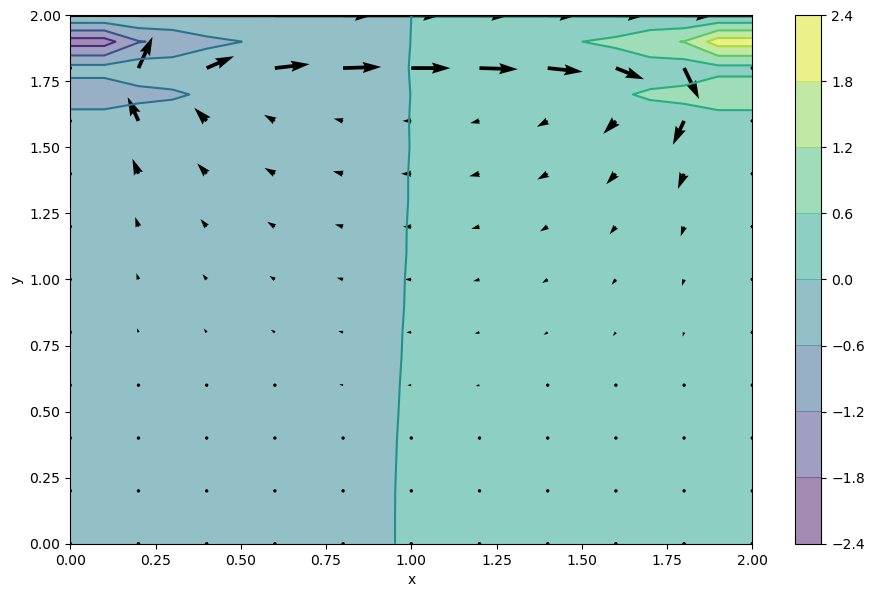

In [7]:
fig = pyplot.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
pyplot.contourf(X, Y, p.T, alpha=0.5, cmap=cm.viridis)  
pyplot.colorbar()
# plotting the pressure field outlines
pyplot.contour(X, Y, p.T, cmap=cm.viridis)  
# plotting velocity field
pyplot.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2].T, v[::2, ::2].T) 
pyplot.xlabel('x')
pyplot.ylabel('y');

Você pode ver que duas zonas de pressão distintas estão se formando e que o padrão espiral esperado do escoamento em cavidade acionado pela tampa está começando a se formar. Experimente diferentes valores de `nt` para ver quanto tempo o sistema leva para estabilizar.

In [8]:
u = numpy.zeros((nx, ny))
v = numpy.zeros((nx, ny))
p = numpy.zeros((nx, ny))
b = numpy.zeros((nx, ny))
nt = 700
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)

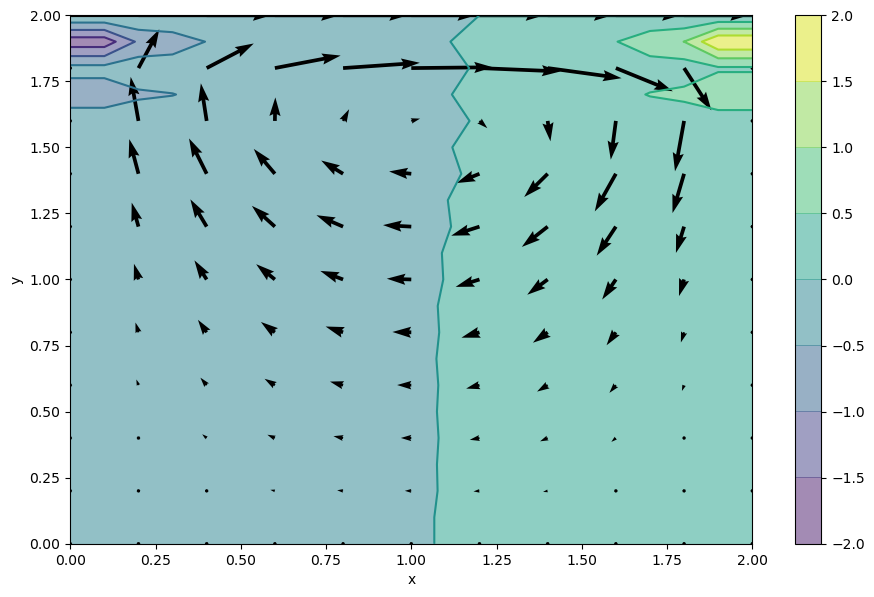

In [9]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.contourf(X, Y, p.T, alpha=0.5, cmap=cm.viridis)
pyplot.colorbar()
pyplot.contour(X, Y, p.T, cmap=cm.viridis)
pyplot.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2].T, v[::2, ::2].T)
pyplot.xlabel('x')
pyplot.ylabel('y');

O gráfico de flechas mostra a magnitude da velocidade nos pontos discretos da malha que criamos.
(Na verdade, estamos mostrando apenas metade dos pontos, porque, caso contrário, é um pouco confuso. A sintaxe `X[::2,::2]` acima é uma maneira conveniente de solicitar todos os outros pontos.)

Outra maneira de visualizar o escoamento na cavidade é usar um `streamplot`:

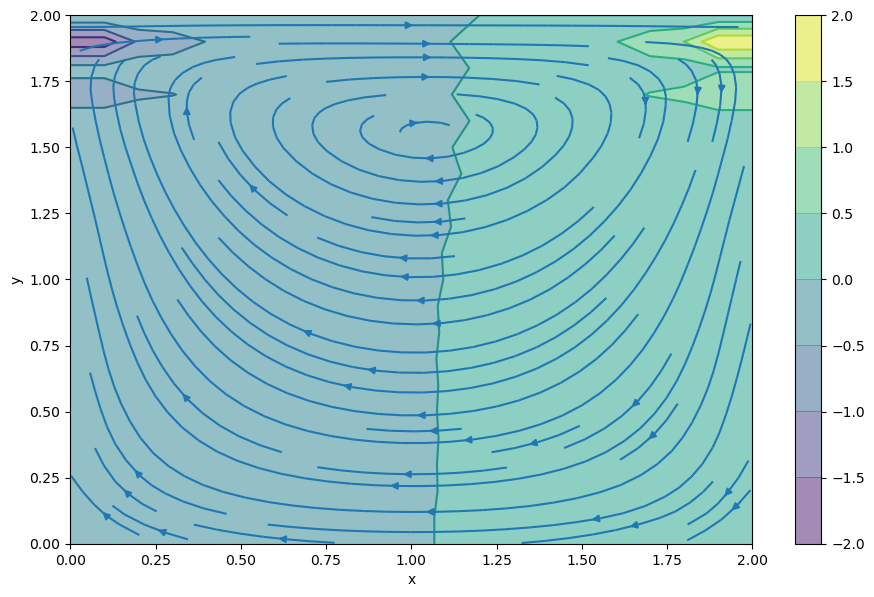

In [10]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.contourf(X, Y, p.T, alpha=0.5, cmap=cm.viridis)
pyplot.colorbar()
pyplot.contour(X, Y, p.T, cmap=cm.viridis)
pyplot.streamplot(X, Y, u.T, v.T)
pyplot.xlabel('x')
pyplot.ylabel('y');

Material Complementar
-----
***

O módulo interativo **12 Passos para Navier–Stokes** é um dos vários componentes da aula de Dinâmica dos Fluidos Computacional ministrada pela Prof. Lorena A. Barba na Universidade de Boston entre 2009 e 2013.

Para uma amostra de quais são os outros componentes dessa disciplina, você pode explorar a seção **Resources** da versão da Primavera 2013 do [the course's Piazza site](https://piazza.com/bu/spring2013/me702/resources).

***

In [11]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

> A célula acima executa o estilo para esse notebook. Nós modificamos o estilo encontrado no GitHub de [CamDavidsonPilon](https://github.com/CamDavidsonPilon), [@Cmrn_DP](https://twitter.com/cmrn_dp).